In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("amazon.csv")
print(data.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [6]:
data["actual_price"] = (
    data["actual_price"]
    .str.replace("₹", "", regex=False)   
    .str.replace(",", "", regex=False)   
    .astype(float)                         
)
data["discount_percentage"] = data["discount_percentage"].str.replace("%","").astype(int)


In [7]:
data["price_after_discount"] = data["actual_price"] - (data["actual_price"] * (data["discount_percentage"]/100))
print("Toatal before discount : ", data["actual_price"].sum())
print("Total revenue : ", data["price_after_discount"].sum())
print("Total discount : ", data["actual_price"].sum() - data["price_after_discount"].sum() )

Toatal before discount :  7976911.28
Total revenue :  4579403.711200001
Total discount :  3397507.5687999995


In [27]:
p = data["product_name"].value_counts()
print("Total products available are : ",len(p.index.unique()))     

Total products available are :  1337


In [33]:
print("Average price of the product : ",data["actual_price"].mean())
print("Average discounted price of the product : ",data["price_after_discount"].mean())
print("Average discount % : ",data["discount_percentage"].mean())

Average price of the product :  5444.990634812287
Average discounted price of the product :  3125.872840409557
Average discount % :  47.69146757679181


In [55]:
maxd = data["discount_percentage"].max()
product = data.loc[data["discount_percentage"] == maxd, "product_name"]
print("Top discount is :",maxd,"%")
print("The product with that discount is :\n",product.iloc[0])


Top discount is : 94 %
The product with that discount is :
 rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver


In [54]:
mind = data["discount_percentage"].min()
product = data.loc[data["discount_percentage"] == mind, "product_name"]
print("least discount is :",mind,"%")
print("The product with that discount is :\n",product.iloc[0])

least discount is : 0 %
The product with that discount is :
 Samsung Original Type C to C Cable - 3.28 Feet (1 Meter), White


In [59]:
maxp = data["actual_price"].max()
product = data.loc[data["actual_price"] == maxp, "product_name"]
print("Maximum price is :",maxp)
print("the product is :\n", product.iloc[0])

Maximum price is : 139900.0
the product is :
 Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)


In [58]:
minp = data["actual_price"].min()
product = data.loc[data["actual_price"] == minp, "product_name"]
print("Minimum price is :",minp)
print("the product is :\n", product.iloc[0])

Minimum price is : 39.0
the product is :
 E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1)


In [ ]:
top10 = data.sort_values('rating', ascending=False).head(10)
print("Top 10 rated products")
print(top10[['rating', 'product_name']])

     rating                                       product_name
1279      |  Eureka Forbes car Vac 100 Watts Powerful Sucti...
324     5.0  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...
174     5.0  Syncwire LTG to USB Cable for Fast Charging Co...
775     5.0  Amazon Basics Wireless Mouse | 2.4 GHz Connect...
1201    4.8  Oratech Coffee Frother electric, milk frother ...
1145    4.8  Swiffer Instant Electric Water Heater Faucet T...
1299    4.8  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...
1223    4.7  FIGMENT Handheld Milk Frother Rechargeable, 3-...
1388    4.7  Campfire Spring Chef Prolix Instant Portable W...
1275    4.7  Multifunctional 2 in 1 Electric Egg Boiling St...


In [ ]:
bottom10 = data.sort_values('rating', ascending=False).tail(10)
print("Bottom 10 rated products")
print(bottom10[['rating', 'product_name']])

     rating                                       product_name
282     3.0  Amazon Brand - Solimo 65W Fast Charging Braide...
263     3.0  7SEVEN Compatible LG TV Remote Suitable for LG...
550     3.0  Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...
1315      3  Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...
1449    2.9  IONIX Tap filter Multilayer | Activated Carbon...
545     2.8  SHREENOVA ID116 Plus Bluetooth Fitness Smart W...
1286    2.8  MR. BRAND Portable USB Juicer Electric USB Jui...
1356    2.6  Green Tales Heat Seal Mini Food Sealer-Impulse...
1243    2.3  Personal Size Blender, Portable Blender, Batte...
1309      2  Khaitan ORFin Fan heater for Home and kitchen-...


In [79]:
c = data["category"].value_counts()

max_count = c.max()
max_category = c[c == max_count].index[0]

high_rating = data["rating"].max()
high_rated_category = data.loc[ data["rating"] == high_rating, "category"].iloc[0]

high_discount = data["discount_percentage"].max()
high_discount_category = data.loc[data["discount_percentage"] == high_discount , "category"].iloc[0]

print("Category with most products :\n",max_category)
print()
print("Category with highest rating :\n",high_rated_category)
print()
print("Category with highest discount :\n",high_discount_category)



Category with most products :
 Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables

Category with highest rating :
 Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|HandheldVacuums

Category with highest discount :
 Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters


In [93]:
data["rating"] = pd.to_numeric(data["rating"], errors='coerce')
data["rating"] = data["rating"].round(0).astype("Int64")
r = data.groupby("rating").size()
print(r)

rating
2       2
3      40
4    1393
5      29
dtype: int64


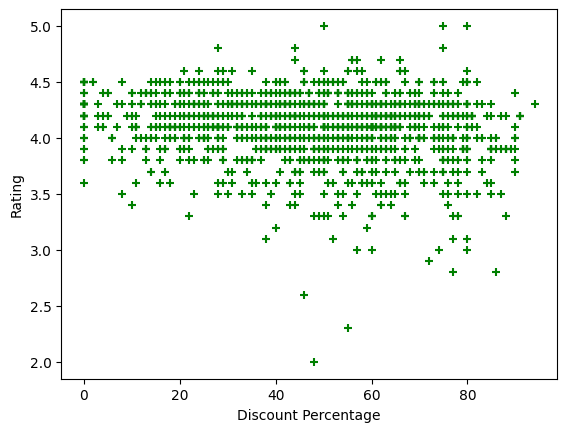

In [23]:
rating = pd.to_numeric(data["rating"], errors='coerce')
dis_per = pd.to_numeric(data["discount_percentage"], errors='coerce')

plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.scatter(dis_per, rating, label = "Scatter plot of ratings v/s discount", marker="+", color = "green")
plt.show()


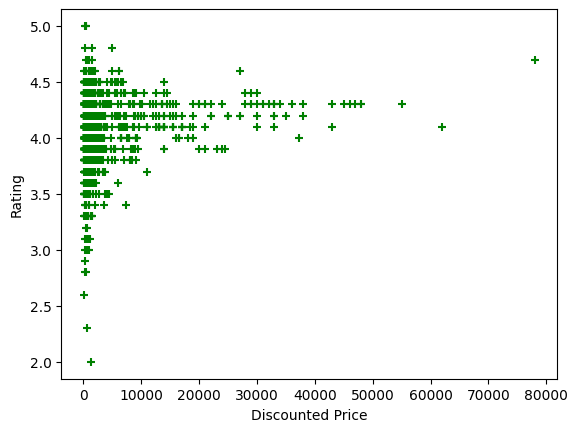

In [45]:
data["discounted_price"] = data["discounted_price"].str.replace("[₹,]", "", regex=True)
dis_pr = pd.to_numeric(data["discounted_price"], errors='coerce')

plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.scatter(dis_pr, rating, label = "Scatter plot of ratings v/s discount", marker="+", color = "green")
plt.show()

In [ ]:
high_rated = data[data["rating"]>=4.5]
hr = high_rated["product_name"].value_counts()
print(high_rated["product_name"])
print()
print("Total products rated >=4.5 are :",hr.values.sum())

20      Duracell USB Lightning Apple Certified (Mfi) B...
30      AmazonBasics USB 2.0 - A-Male to A-Female Exte...
40      AmazonBasics USB 2.0 Cable - A-Male to B-Male ...
70      oraimo 65W Type C to C Fast Charging Cable USB...
88      Lapster 65W compatible for OnePlus Dash Warp C...
                              ...                        
1399    Cafe JEI French Press Coffee and Tea Maker 600...
1410    Sujata Supermix, Mixer Grinder, 900 Watts, 3 J...
1416    Aqua d pure Active Copper 12-L RO+UV Water Fil...
1428    Sujata Dynamix, Mixer Grinder, 900 Watts, 3 Ja...
1438    INALSA Air Fryer Digital 4L Nutri Fry - 1400W ...
Name: product_name, Length: 104, dtype: object

Total products rated >=4 are : 104


In [60]:
low_rated = data[data["rating"]<3]
lr = low_rated["product_name"].value_counts()
print(low_rated["product_name"])
print()
print("Total products rated <=3 are :",lr.values.sum())

545     SHREENOVA ID116 Plus Bluetooth Fitness Smart W...
1243    Personal Size Blender, Portable Blender, Batte...
1286    MR. BRAND Portable USB Juicer Electric USB Jui...
1309    Khaitan ORFin Fan heater for Home and kitchen-...
1356    Green Tales Heat Seal Mini Food Sealer-Impulse...
1449    IONIX Tap filter Multilayer | Activated Carbon...
Name: product_name, dtype: object

Total products rated <=3 are : 6


In [65]:
l = 0
x = ""
for i in data["review_title"]:
    if len(i) > l:
        l = len(i)
        x = i
print(x)
print()
print("The length of the comment is :",l)

Good Product,Includes relevant attachments in this price point,2 in 1 is exactly what i needed! (Read the rest for pros and cons),Value for money,Apt vacuum cleaner for my requirements, does the job,Not so satisfying, if you have other options to not choose it, then go for that other option.,Okay okay product,Product is very nice and handy but heated after used of 10 minutes. Overall performance is good.

The length of the comment is : 407
